In [0]:
# Versión del lenguaje Python
from platform import python_version
print('Versión del lenguaje Python utilizada :', python_version())

Versión del lenguaje Python utilizada : 3.9.5


In [0]:
# Para actualizar un paquete, ejecute el siguiente comando en la terminal o en el símbolo del sistema:
# pip install -U nombre_paquete

# Para instalar la versión exacta de un paquete, ejecute el siguiente comando en la terminal o en el símbolo del sistema:
# pip install nombre_paquete==versión_deseado

# Después de instalar o actualizar el paquete, reinicie su computadora portátil jupyter.

# Instale el paquete de marca de agua.
# Este paquete se utiliza para registrar las versiones de otros paquetes utilizados en este cuaderno de jupyter.
!pip install -q -U watermark

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-6db4c97a-df25-454b-a6bd-f6ec92e1cf9c/bin/python -m pip install --upgrade pip' command.


### Cargando paquetes

In [0]:
# Importaciones para manipulación de datos
import numpy as np
import pandas as pd

# Importaciones para ver
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Importaciones para cálculos estadísticos.
import scipy
from scipy.stats import kurtosis, skew, shapiro
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Importaciones para formato de gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10

In [0]:
# Versiones de paquetes utilizados en este cuaderno jupyter
%reload_ext watermark
%watermark -a "Eric Passos" --iversions

Author: Eric Passos

scipy     : 1.7.1
pandas    : 1.3.4
seaborn   : 0.11.2
numpy     : 1.20.3
matplotlib: 3.4.3



### Cargando los datos

In [0]:
# Nota: El valor de las acciones fue ajustado para facilitar la creación de gráficos de forma didáctica.
dados = pd.read_csv("/dbfs/FileStore/shared_uploads/eric.passos@dataside.com.br/dataset-20.csv", parse_dates = True, index_col = "Data")

In [0]:
# Ver registros
# Cada columna representa el valor de la acción en cada día de la serie.
# valor de apertura, cierre, máximo, mínimo y volumen.
# La columna Cambio(%) representa la variación diaria.
dados.head()

,Abertura,Fechamento,Maximo,Minimo,Volume,Mudanca(%)
Data,,,,,,
2020-03-10,276.0,270.3,280.0,268.0,109.42,0.00
2020-03-10,275.0,270.3,280.0,268.0,124.56,0.11
2020-03-09,266.0,270.0,284.0,259.5,191.21,-7.91
2020-03-06,294.6,293.2,294.9,283.0,104.89,-1.48
2020-03-05,303.0,297.6,305.5,294.2,90.58,0.68


In [0]:
# Tipos de datos
dados.dtypes

Out[55]: Abertura      float64
Fechamento    float64
Maximo        float64
Minimo        float64
Volume        float64
Mudanca(%)    float64
dtype: object

In [0]:
# Shape
dados.shape

Out[56]: (5037, 6)

In [0]:
# Resumen estadístico
dados.describe()

,Abertura,Fechamento,Maximo,Minimo,Volume,Mudanca(%)
count,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000
mean,35.002488,35.001910,35.589655,34.377016,9.748444,0.152400
std,62.600066,62.596556,63.605892,61.530026,26.663983,4.423538
min,0.640000,0.640000,0.670000,0.620000,0.000000,-61.630000
25%,2.960000,2.980000,3.050000,2.900000,0.310000,-1.520000
50%,6.320000,6.280000,6.460000,6.130000,1.230000,0.000000
75%,25.820000,25.890000,26.270000,25.530000,5.840000,1.490000
max,330.600000,331.000000,336.000000,326.600000,711.800000,48.070000


## Ver el precio de cierre diario de las acciones a tiempo

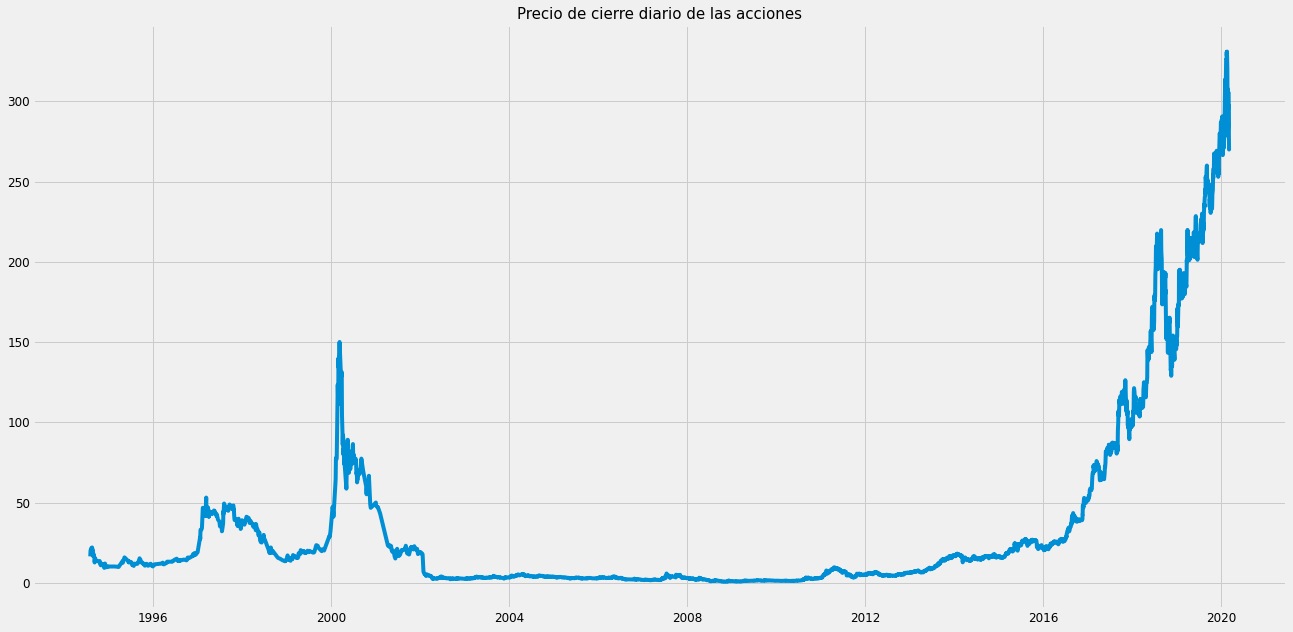

In [0]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Precio de cierre diario de las acciones", size = 15)
plt.show()

Vamos calcular o retorno diário da série.

In [0]:
# Calcular el porcentaje de cambio en el precio de cierre diario de la acción,
# Es decir, cuánto varía el valor de cierre de un día para otro, el rendimiento diario de la acción.
retorno_diario = dados["Fechamento"].pct_change().dropna()
retorno_diario.head()

Out[59]: Data
2020-03-10    0.000000
2020-03-09   -0.001110
2020-03-06    0.085926
2020-03-05    0.015007
2020-03-04   -0.006720
Name: Fechamento, dtype: float64

Calculemos el rendimiento acumulado de la serie.

In [0]:
# Rendimiento acumulado
retorno_diario_acumulado = (1 + retorno_diario).cumprod() - 1
retorno_diario_acumulado.max()

Out[60]: 0.2245652978172401

### Análisis y Estadística Descriptiva

Usemos estadísticas para calcular el rendimiento promedio y la varianza (desviación estándar).

In [0]:
# Precio medio diario de cierre de la acción
media_retorno_diario = np.mean(retorno_diario)

# Desviación estándar del cierre diario del precio de las acciones
desvio_retorno_diario = np.std(retorno_diario)

# Media y desviación estándar
print("Rentabilidad promedio de cierre:", media_retorno_diario)
print("Desviación estándar del retorno de cierre:", desvio_retorno_diario)

Rentabilidad promedio de cierre: 0.0004575329489688095
Desviación estándar del retorno de cierre: 0.04785141655942809


Consideremos el año con 252 días de actividad en la bolsa estadounidense.

In [0]:
# Promedio y desviación estándar del año (considerando 252 días hábiles de operaciones en la bolsa de valores estadounidense)
print("Retorno Médio Anualizado de Fechamento:", (1 + media_retorno_diario) ** 252 - 1)
print("Desvio Padrão Anualizado de Fechamento:", desvio_retorno_diario*np.sqrt(252))

Retorno Médio Anualizado de Fechamento: 0.12217855548103884
Desvio Padrão Anualizado de Fechamento: 0.7596176885904283


Aunque el comportamiento de las acciones ha sido bueno en los últimos años, en promedio la ganancia ha sido baja, aunque positiva. A largo plazo, el inversor no perdió dinero. Creemos una trama con el retorno diario.

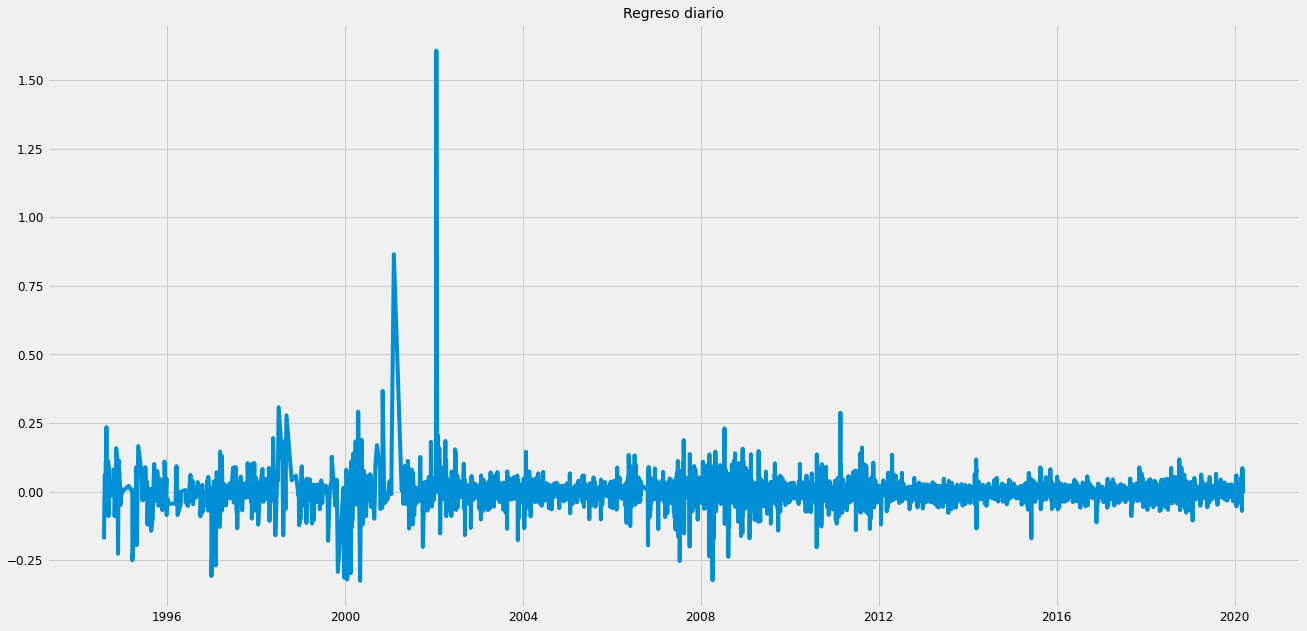

In [0]:
# Plot
plt.plot(retorno_diario)
plt.title("Regreso diario", size = 14)
plt.show()

Con sólo dos variaciones importantes, el rendimiento diario ha sido constante en el tiempo. Creemos un histograma con la distribución del retorno diario.

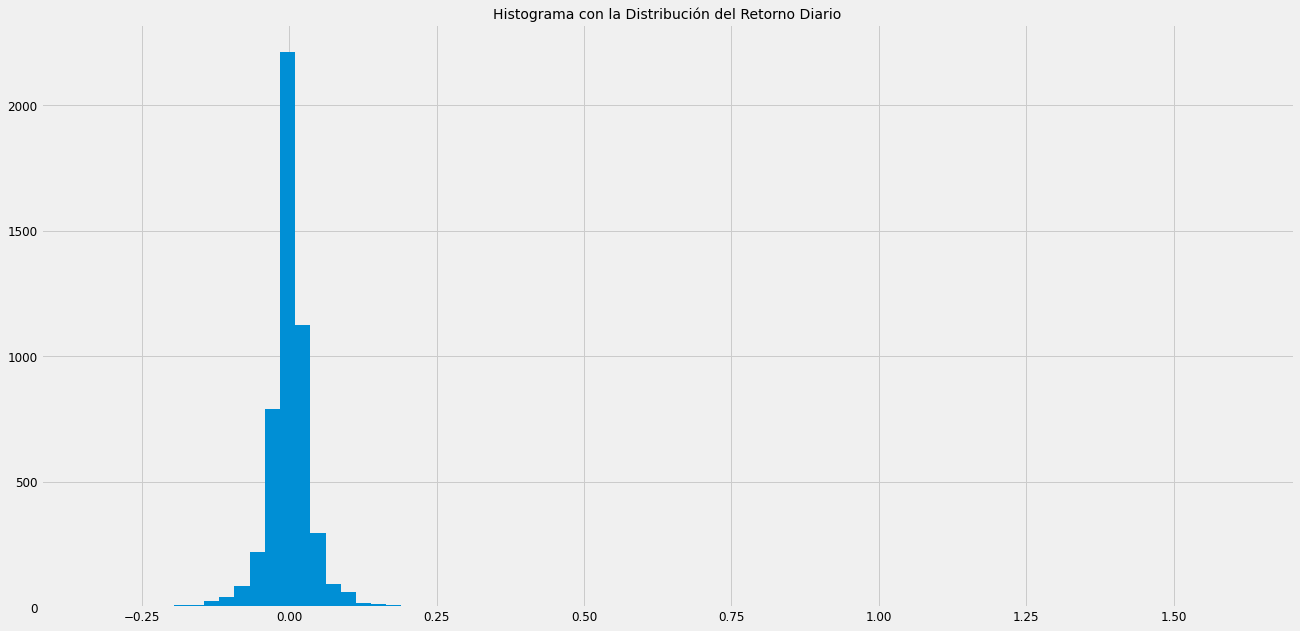

In [0]:
# Plot
plt.hist(retorno_diario, bins = 75)
plt.title("Histograma con la Distribución del Retorno Diario", size = 14)
plt.show()

Los valores están muy cerca de la media. Pero confirmemos esto calculando la curtosis y la asimetría.

In [0]:
# calculando la curtosis y la asimetría
print("Curtosis:", kurtosis(retorno_diario))
print("Asimetría:", skew(retorno_diario))

Curtosis: 278.4606940718125
Asimetría: 8.379693825200768


A curtose indica que os registros estão bem próximos da média. Mas a assimetria indica que os dados estão bem distorcidos e distantes de uma distribuição normal. Vamos aplicar o teste de normalidade na série.

### Prueba de normalidad de Shapiro-Wilk

In [0]:
# Realiza la prueba de normalidad de la serie.
teste_normalidade = shapiro(retorno_diario)[1]

# Comprobar rentabilidad basada en un valor p de 0,05
if teste_normalidade <= 0.05:
    print("Rechazamos la hipótesis nula de normalidad de los datos.")
else:
    print("No pudimos rechazar la hipótesis nula de la normalidad de los datos.")

Rechazamos la hipótesis nula de normalidad de los datos.


Como imaginábamos, la distribución no es normal. Apliquemos una transformación logarítmica a la serie y luego apliquemos la técnica de diferenciación para eliminar patrones de tendencia de la serie y dejar solo los datos reales que nos interesan. Con esto calculamos el retorno diario.

In [0]:
#Transformación y diferenciación logarítmica para calcular el rendimiento diario.
log_retorno_diario = (np.log(dados["Fechamento"]) - np.log(dados["Fechamento"]).shift(-1)).dropna()

# Calculamos la media y la desviación estándar después de la transformación.
log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

Creemos una trama con el regreso diario de la serie transformada.

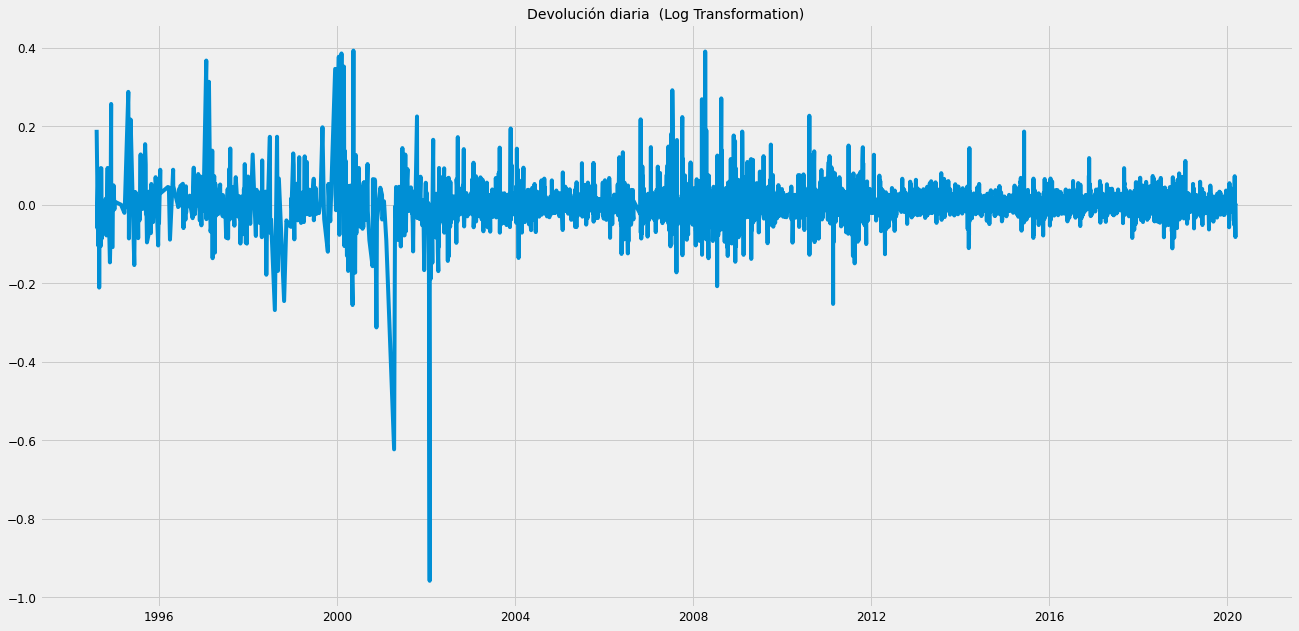

In [0]:
# Plot
plt.plot(log_retorno_diario)
plt.title("Devolución diaria  (Log Transformation)", size = 14)
plt.show()

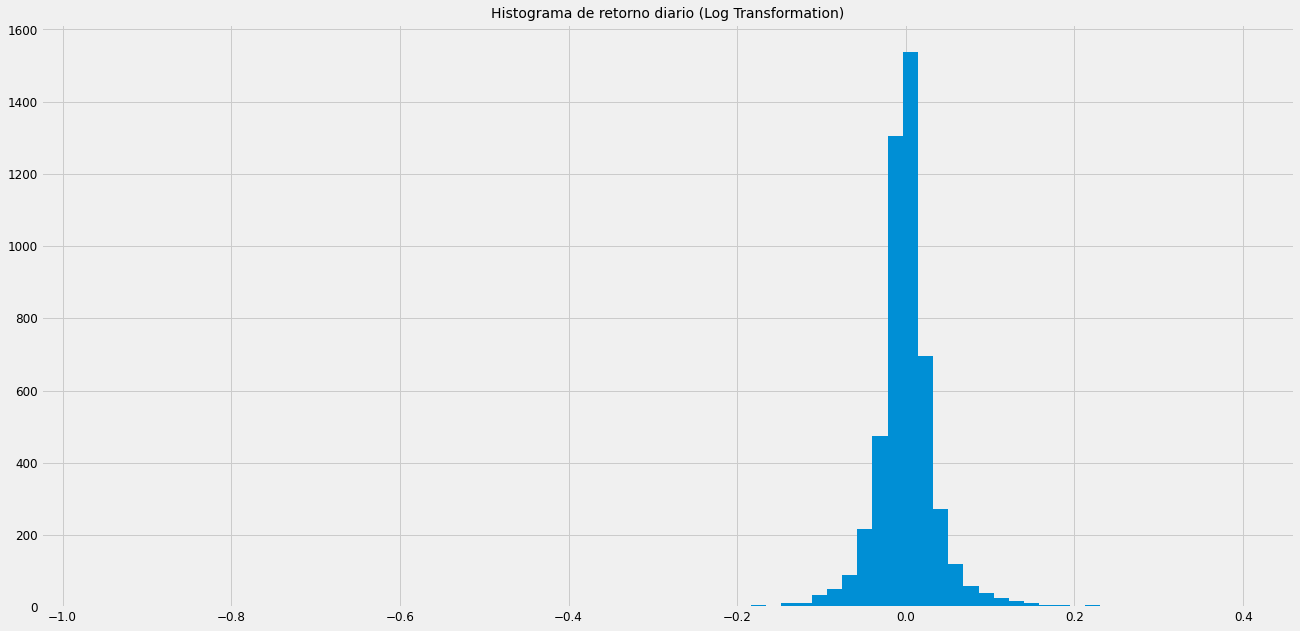

In [0]:
# Plot
plt.hist(log_retorno_diario, bins = 75)
plt.title("Histograma de retorno diario (Log Transformation)", size = 14)
plt.show()

In [0]:
# Calculando de nuevo la curtosis y la asimetría
print("Curtosis:", kurtosis(log_retorno_diario))
print("Asimetria:", skew(log_retorno_diario))

Curtosis: 63.102709019136725
Asimetria: -1.3916921515501146


In [0]:
# Realiza la prueba de normalidad de la serie.
teste_normalidade = shapiro(log_retorno_diario)[1]

# Comprobar rentabilidad basada en un valor p de 0,05
if teste_normalidade <= 0.05:
    print("Rechazamos la hipótesis nula de normalidad de los datos.")
else:
    print("No pudimos rechazar la hipótesis nula de la normalidad de los datos.")

Rechazamos la hipótesis nula de normalidad de los datos.


Los datos todavía no son normales, pero hemos reducido la distorsión de los datos. Podríamos aplicar otras transformaciones, pero para los propósitos de este estudio esto es suficiente. Seguimos con la serie transformada.

### Valor Histórico

Vamos calcular o valor histórico do preço da ação.

In [0]:
# Nivel de variación
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
print("Certeza de que las pérdidas diarias no superarán el VaR% en un día determinado según los valores históricos.")
print("VaR 95%:", var)

Certeza de que las pérdidas diarias no superarán el VaR% en un día determinado según los valores históricos.
VaR 95%: -0.053911182572115926


In [0]:
# Var durante los próximos 5 días
var * np.sqrt(5)

Out[73]: -0.12054906897865318

### Valor Histórico Condicional

In [0]:
# Nivel de variación
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print("En el peor 5% de los casos, las pérdidas fueron, en promedio, superiores al porcentaje histórico.")
print("CVaR 95%:", cvar)

En el peor 5% de los casos, las pérdidas fueron, en promedio, superiores al porcentaje histórico.
CVaR 95%: -0.09528907737617057


### Monte Carlo simulation

In [0]:
# Monte Carlo Simulation

# Número de días por delante
dias_posteriores = 252

# Número de simulaciones
simulacoes = 2500

# Valor de la última acción
ultimo_preco = 270.3

# Crea una matriz vacía con las dimensiones.
results = np.empty((simulacoes, dias_posteriores))

# Loop para cada simulación.
for s in range(simulacoes):
    
    # Calcula la rentabilidad con datos aleatorios siguiendo una distribución normal.
    random_returns = 1 + np.random.normal(loc = log_media_retorno_diario, 
                                          scale = log_desvio_retorno_diario, 
                                          size = dias_posteriores)
    
    result = ultimo_preco * (random_returns.cumprod())
    
    results[s, :] = result

In [0]:
# Definición del índice de la serie simulada
index = pd.date_range("2020-03-11", periods = dias_posteriores, freq = "D")
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)

## Resultado de la Simulación de Montecarlo

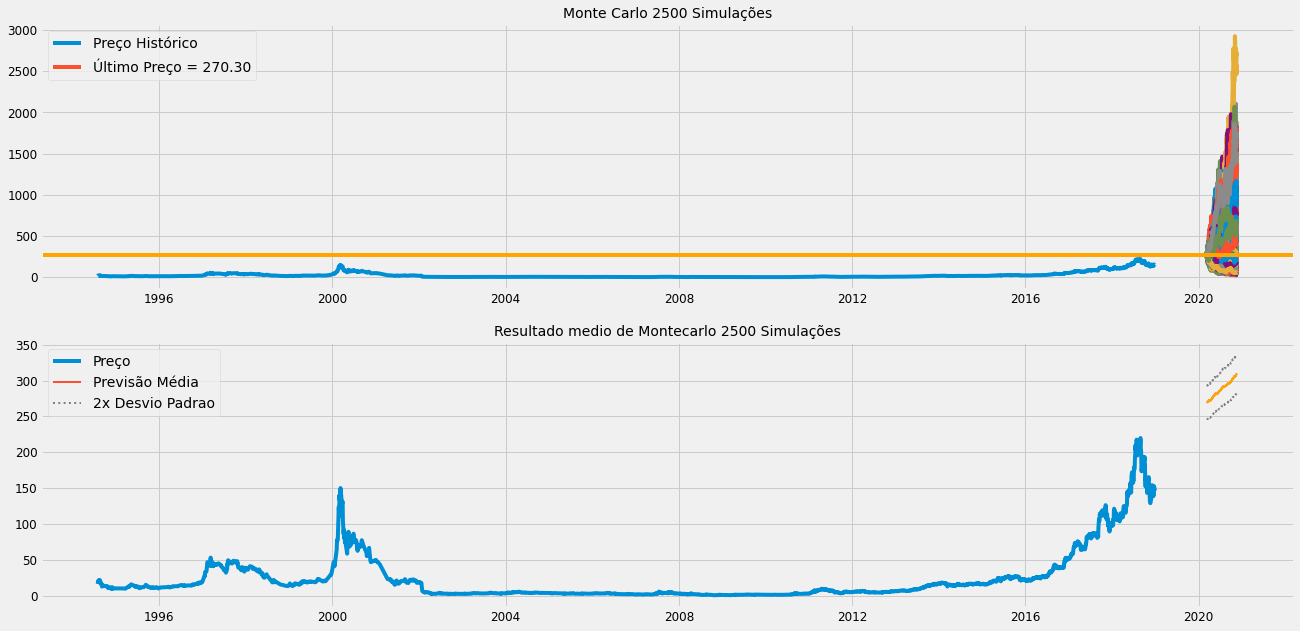

In [0]:
# Dividir el área de la parcela en 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Plot
ax[0].plot(dados["Fechamento"][:"2018-12-31"])

ax[0].plot(resultados)

ax[0].axhline(270.30, c = "orange")

ax[0].set_title(f"Monte Carlo {simulacoes} Simulações", size = 14)

ax[0].legend(["Preço Histórico", "Último Preço = 270.30"])

ax[1].plot(dados["Fechamento"][:"2018-12-31"])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].plot(media_resultados, lw = 2, c = "orange")

ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Resultado medio de Montecarlo {simulacoes} Simulações", size = 14)

ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrao"])

plt.show()

El pronóstico es positivo con los datos simulados y en el largo plazo las acciones de CDR tienden a apreciarse. Pero no espere un gran rendimiento de estas acciones.

# Fin